From the given <b> ‘Iris’ </b> dataset, predict the optimum number of clusters and 
represent it visually. <br>
<br>
 <b> Abhishek.J.N</b>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

In [20]:
df = pd.read_csv("iris.csv")

In [21]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [18]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [14]:
df.isna().sum() #NO null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
duplicate = df[df.duplicated()] #No duplicates
duplicate.count()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [61]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
df['Species'].value_counts() #All three species has equal records

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

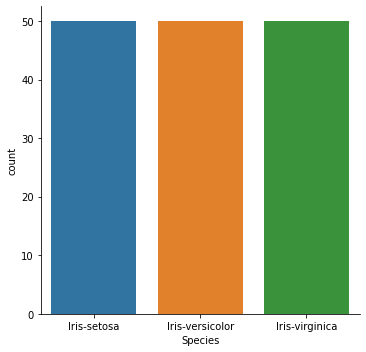

In [10]:
sns.factorplot('Species',data=df,kind='count')

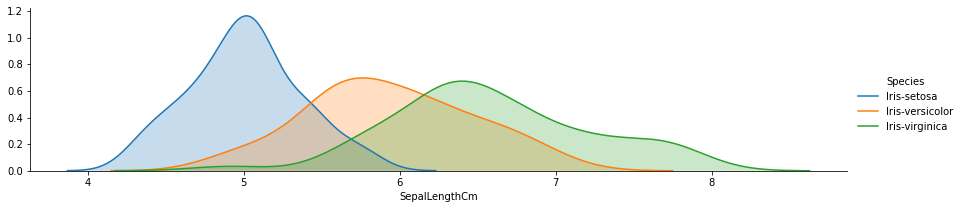

In [29]:
fig = sns.FacetGrid(df,hue='Species',aspect=4)
fig.map(sns.kdeplot,'SepalLengthCm',shade=True)
fig.add_legend()

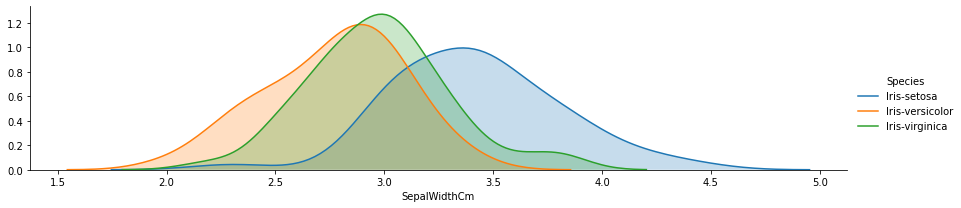

In [30]:
fig = sns.FacetGrid(df,hue='Species',aspect=4)
fig.map(sns.kdeplot,'SepalWidthCm',shade=True)
fig.add_legend()

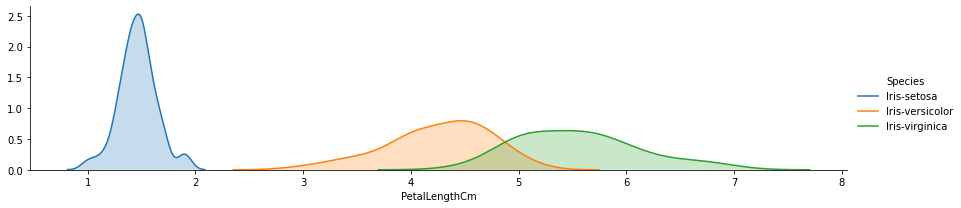

In [31]:
fig = sns.FacetGrid(df,hue='Species',aspect=4)
fig.map(sns.kdeplot,'PetalLengthCm',shade=True)
fig.add_legend()

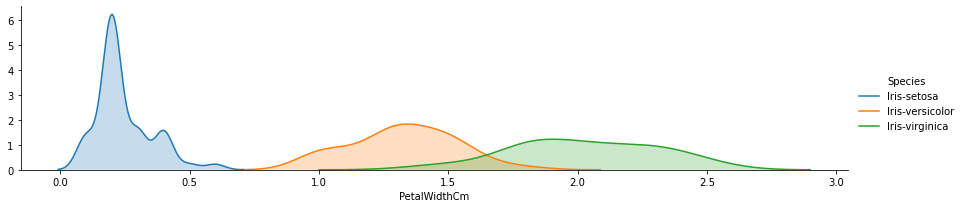

In [45]:
fig = sns.FacetGrid(df,hue='Species',aspect=4)
fig.map(sns.kdeplot,'PetalWidthCm',shade=True)
fig.add_legend()

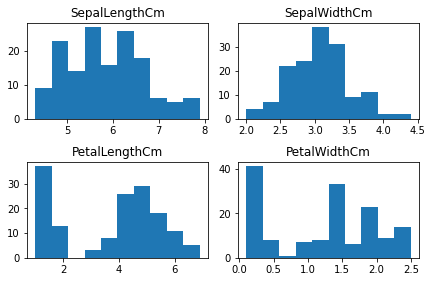

In [49]:
n_bins = 10 #Histogram
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(df['SepalLengthCm'], bins = n_bins);
axs[0,0].set_title('SepalLengthCm');
axs[0,1].hist(df['SepalWidthCm'], bins = n_bins);
axs[0,1].set_title('SepalWidthCm');
axs[1,0].hist(df['PetalLengthCm'], bins = n_bins);
axs[1,0].set_title('PetalLengthCm');
axs[1,1].hist(df['PetalWidthCm'], bins = n_bins);
axs[1,1].set_title('PetalWidthCm');
# add some spacing between subplots
fig.tight_layout(pad=1.0);

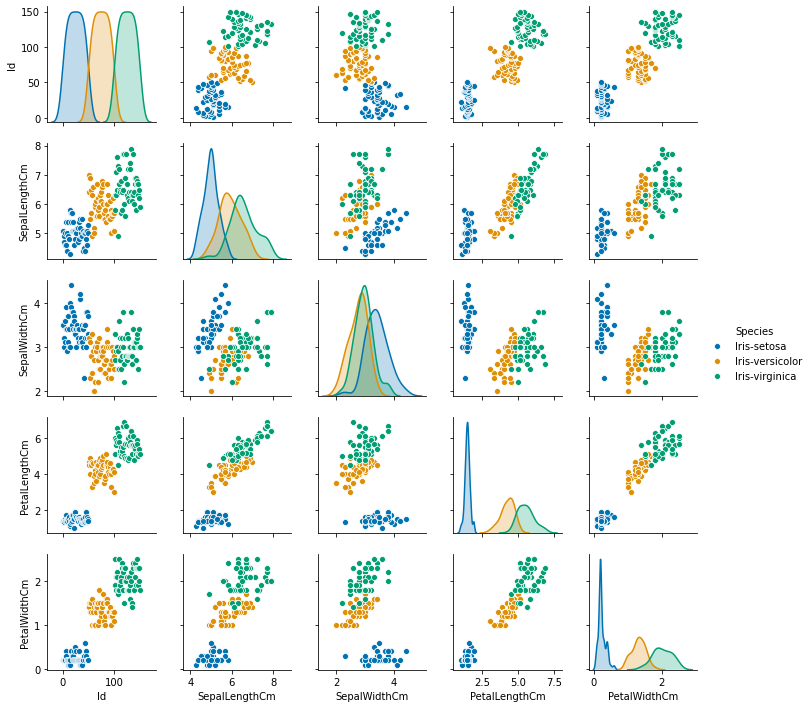

In [50]:
sns.pairplot(df, hue="Species", height = 2, palette = 'colorblind') #Pairplot

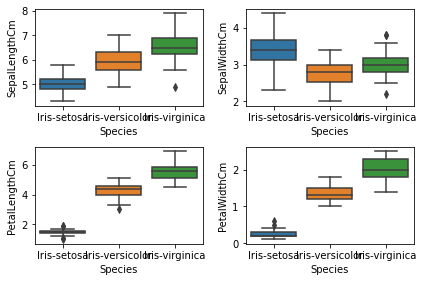

In [58]:
fig, axs = plt.subplots(2, 2) #Box plot
fn = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
cn = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = df, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = df, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = df, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = df,  order = cn, ax = axs[1,1]);
# add some spacing between subplots
fig.tight_layout(pad=1.0)

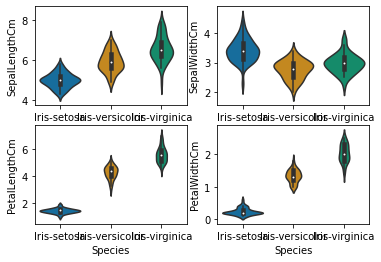

In [60]:
fig, axs = plt.subplots(2, 2) #Violin plot
sns.violinplot(x="Species", y="SepalLengthCm", data=df, size=5, order = cn, palette = 'colorblind',ax = axs[0,0])
sns.violinplot(x="Species", y="SepalWidthCm", data=df, size=5, order = cn, palette = 'colorblind',ax = axs[0,1])
sns.violinplot(x="Species", y="PetalLengthCm", data=df, size=5, order = cn, palette = 'colorblind',ax = axs[1,0])
sns.violinplot(x="Species", y="PetalWidthCm", data=df, size=5, order = cn, palette = 'colorblind',ax = axs[1,1])

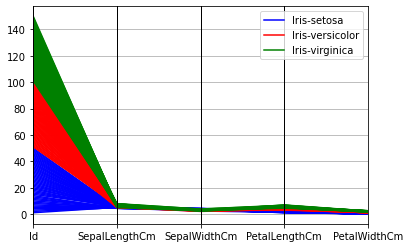

In [65]:
parallel_coordinates(df, "Species", color = ['blue', 'red', 'green']); #Parallel coordinates

### correlation

In [68]:
corr = df.corr()
corr

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


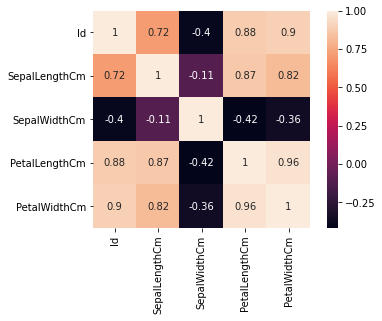

In [66]:
corrmat = df.corr()
sns.heatmap(corrmat, annot = True, square = True)

The main takeaway is that the petal measurements have highly positive correlation, while the sepal one are uncorrelated. Note that the petal features also have relatively high correlation with sepal_length, but not with sepal_width.

### Build Clusters

# K-Means Clustering

The main element of the algorithm works by a two-step process called <b>expectation-maximization.</b> <br>The <b>expectation</b> step assigns each data point to its nearest centroid. Then, <b>the maximization</b> step computes the mean of all the points for each cluster and sets the new centroid.

<img src="https://files.realpython.com/media/kmeans-algorithm.a94498a7ecd2.png" width=600>

In [5]:
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df2 = df.iloc[:,:-1]

In [91]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df2)

In [72]:
kmeans = KMeans(init="random",
              n_clusters=3,
              n_init=10,
            max_iter=300,
          random_state=42)

In [75]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [76]:
kmeans.inertia_ # The lowest SSE value

177.05608895062977

In [28]:
kmeans.cluster_centers_ # Final locations of the centroid

array([[ 1.14317894,  1.03542672, -0.07079946,  1.04224753,  1.09269889],
       [-1.1547262 , -1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [ 0.07560189,  0.03894137, -0.73184462,  0.30676007,  0.21508647]])

In [29]:
kmeans.n_iter_ # The number of iterations required to converge

12

# Choosing the Appropriate Number of Clusters

- The elbow method <br>
- The silhouette coefficient <br>

- the elbow method

In [39]:
kmeans_kwargs = {
              "init": "random",
              "n_init": 10,
             "max_iter": 300,
             "random_state": 42, }

 # A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

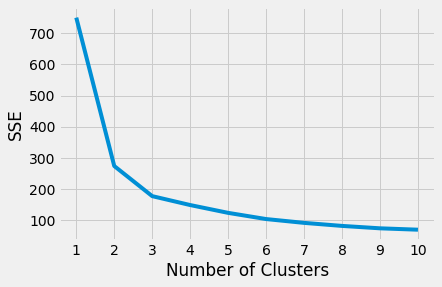

In [40]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

In [41]:
 kl = KneeLocator(
        range(1, 11), sse, curve="convex", direction="decreasing" ) #If you’re having trouble choosing the elbow point of the curve,
    #then you could use a Python package, kneed, to identify the elbow point programmatically

In [43]:
kl.elbow

3

- The silhouette coefficient

In [61]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []          
   
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

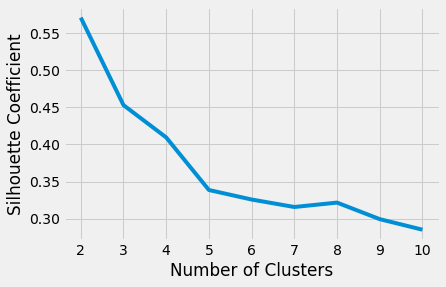

In [62]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# Applying kmeans

In [107]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_features)

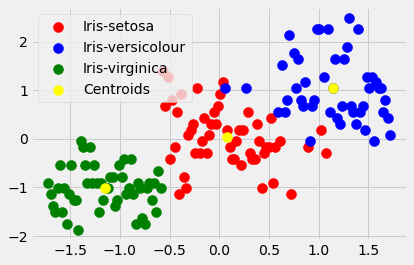

In [108]:
# Visualising the clusters - On the first two columns
plt.scatter(scaled_features[y_kmeans == 0, 0], scaled_features[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(scaled_features[y_kmeans == 1, 0], scaled_features[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(scaled_features[y_kmeans == 2, 0], scaled_features[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

In [112]:
cluster_cen = kmeans.cluster_centers_
cluster_cen

array([[ 0.07560189,  0.03894137, -0.73184462,  0.30676007,  0.21508647],
       [ 1.14317894,  1.03542672, -0.07079946,  1.04224753,  1.09269889],
       [-1.1547262 , -1.01457897,  0.84230679, -1.30487835, -1.25512862]])

In [111]:
kmeans.inertia_

177.05608895062977